# Decorrelating your data and dimension reduction

# Visualizing the PCA transformation

El análisis de componentes principales es una técnica utilizada para reducir la dimensionalidad de un conjunto de datos. Técnicamente lo que haces es buscar una proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados. Convierte un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal llamadas componentes principales. Esta técnica es usada sobre todo en el análisis exploratorio de datos y para construir modelos predictivos.
Una de las ventajas de la PCA para reducir la dimensionalidad de un grupo de datos, es que retiene aquellas características del conjunto de datos que contribuye más a su varianza, manteniendo un orden de bajo nivel de los componentes principales e ignorando los de alto nivel.
Existen dos formas básicas a la hora de aplicar la PCA:

1.- Método basado en la matriz de correlación, cuando los datos no son dimensionalmente homogéneos o el orden de la magnitud de las variables aleatorias medidas no es el mismo 

2.- Método basado en la matriz de covarianzas, que se usa cuando los datos son dimensionalmente homogéneos y presentan valores medios similares.

Supongamos que tenemos la longitud y la anchura de los granos de maíz en un array y sospechamos que estos están correlados, para ello vamos a proceder a realizar un scatter plot de estos valores y a calcular su coeficiente de Pearson.

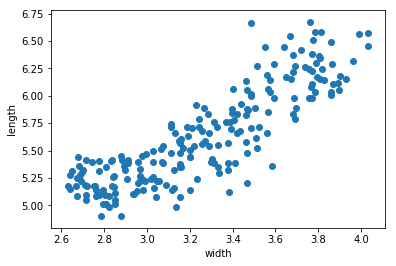

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
grain = np.array([[ 3.312,  5.763],[ 3.333,  5.554],[ 3.337,  5.291],[ 3.379,  5.324],[ 3.562,  5.658],[ 3.312,  5.386],
       [ 3.259,  5.563],[ 3.302,  5.42 ],[ 3.465,  6.053],[ 3.505,  5.884],[ 3.242,  5.714],[ 3.201,  5.438],
       [ 3.199,  5.439],[ 3.156,  5.479],[ 3.114,  5.482],[ 3.333,  5.351],[ 3.383,  5.119],[ 3.514,  5.527],
       [ 3.466,  5.205],[ 3.049,  5.226],[ 3.129,  5.658],[ 3.168,  5.52 ],[ 3.507,  5.618],[ 2.936,  5.099],
       [ 3.245,  5.789],[ 3.421,  5.833],[ 3.026,  5.395],[ 2.956,  5.395],[ 3.221,  5.541],[ 3.065,  5.516],
       [ 2.975,  5.454],[ 3.371,  5.757],[ 3.186,  5.717],[ 3.15 ,  5.585],[ 3.328,  5.712],[ 3.485,  5.709],
       [ 3.464,  5.826],[ 3.683,  5.832],[ 3.288,  5.656],[ 3.298,  5.397],[ 3.156,  5.348],[ 3.158,  5.351],
       [ 3.201,  5.138],[ 3.396,  5.877],[ 3.462,  5.579],[ 3.155,  5.376],[ 3.393,  5.701],[ 3.377,  5.57 ],
       [ 3.291,  5.545],[ 3.258,  5.678],[ 3.272,  5.585],[ 3.434,  5.674],[ 3.113,  5.715],[ 3.199,  5.504],
       [ 3.113,  5.741],[ 3.212,  5.702],[ 3.377,  5.388],[ 3.412,  5.384],[ 3.419,  5.662],[ 3.032,  5.159],
       [ 2.85 ,  5.008],[ 2.879,  4.902],[ 3.042,  5.076],[ 3.07 ,  5.395],[ 3.026,  5.262],[ 3.119,  5.139],
       [ 3.19 ,  5.63 ],[ 3.158,  5.609],[ 3.153,  5.569],[ 2.882,  5.412],[ 3.561,  6.191],[ 3.484,  5.998],
       [ 3.594,  5.978],[ 3.93 ,  6.154],[ 3.486,  6.017],[ 3.438,  5.927],[ 3.403,  6.064],[ 3.814,  6.579],
       [ 3.639,  6.445],[ 3.566,  5.85 ],[ 3.467,  5.875],[ 3.857,  6.006],[ 3.864,  6.285],[ 3.772,  6.384],
       [ 3.801,  6.366],[ 3.651,  6.173],[ 3.764,  6.084],[ 3.67 ,  6.549],[ 4.033,  6.573],[ 4.032,  6.45 ],
       [ 3.785,  6.581],[ 3.796,  6.172],[ 3.693,  6.272],[ 3.86 ,  6.037],[ 3.485,  6.666],[ 3.463,  6.139],
       [ 3.81 ,  6.341],[ 3.552,  6.449],[ 3.512,  6.271],[ 3.684,  6.219],[ 3.525,  5.718],[ 3.694,  5.89 ],
       [ 3.892,  6.113],[ 3.681,  6.369],[ 3.755,  6.248],[ 3.786,  6.037],[ 3.806,  6.152],[ 3.573,  6.033],
       [ 3.763,  6.675],[ 3.674,  6.153],[ 3.769,  6.107],[ 3.791,  6.303],[ 3.902,  6.183],[ 3.737,  6.259],
       [ 3.991,  6.563],[ 3.719,  6.416],[ 3.897,  6.051],[ 3.815,  6.245],[ 3.769,  6.227],[ 3.857,  6.493],
       [ 3.962,  6.315],[ 3.563,  6.059],[ 3.387,  5.762],[ 3.771,  5.98 ],[ 3.582,  5.363],[ 3.869,  6.111],
       [ 3.594,  6.285],[ 3.687,  5.979],[ 3.773,  6.513],[ 3.69 ,  5.791],[ 3.755,  5.979],[ 3.825,  6.144],
       [ 3.268,  5.884],[ 3.395,  5.845],[ 3.408,  5.776],[ 3.465,  5.477],[ 3.574,  6.145],[ 3.231,  5.92 ],
       [ 3.286,  5.832],[ 3.472,  5.872],[ 2.994,  5.472],[ 3.073,  5.541],[ 3.074,  5.389],[ 2.967,  5.224],
       [ 2.777,  5.314],[ 2.687,  5.279],[ 2.719,  5.176],[ 2.967,  5.267],[ 2.911,  5.386],[ 2.648,  5.317],
       [ 2.84 ,  5.263],[ 2.776,  5.405],[ 2.833,  5.408],[ 2.693,  5.22 ],[ 2.755,  5.175],[ 2.675,  5.25 ],
       [ 2.849,  5.053],[ 2.745,  5.394],[ 2.678,  5.444],[ 2.695,  5.304],[ 2.879,  5.451],[ 2.81 ,  5.35 ],
       [ 2.847,  5.267],[ 2.968,  5.333],[ 2.794,  5.011],[ 2.941,  5.105],[ 2.897,  5.319],[ 2.837,  5.417],
       [ 2.668,  5.176],[ 2.715,  5.09 ],[ 2.701,  5.325],[ 2.845,  5.167],[ 2.763,  5.088],[ 2.763,  5.136],
       [ 2.641,  5.278],[ 2.821,  4.981],[ 2.71 ,  5.186],[ 2.642,  5.145],[ 2.758,  5.18 ],[ 2.893,  5.357],
       [ 2.775,  5.09 ],[ 3.017,  5.236],[ 2.909,  5.24 ],[ 2.85 ,  5.108],[ 3.026,  5.495],[ 2.683,  5.363],
       [ 2.716,  5.413],[ 2.675,  5.088],[ 2.821,  5.089],[ 2.787,  4.899],[ 2.717,  5.046],[ 2.804,  5.091],
       [ 2.953,  5.132],[ 2.63 ,  5.18 ],[ 2.975,  5.236],[ 3.126,  5.16 ],[ 3.054,  5.224],[ 3.128,  5.32 ],
       [ 2.911,  5.41 ],[ 3.155,  5.073],[ 2.989,  5.219],[ 3.135,  4.984],[ 2.81 ,  5.009],[ 3.091,  5.183],
       [ 2.96 ,  5.204],[ 2.981,  5.137],[ 2.795,  5.14 ],[ 3.232,  5.236],[ 2.836,  5.175],[ 2.974,  5.243]])

width = grain[:,0]
length = grain[:,1]

_ = plt.scatter(width, length)
_ = plt.xlabel('width')
_ = plt.ylabel('length')
plt.show()


In [6]:
#Ahora calculamos el coeficiente de pearson 
pearson_value, pvalue = pearsonr(width, length)
print(pearson_value)

0.860414937714


Podemos ver como efectivamente estas dos variables tienen un coeficiente de Pearson próximo a uno por lo que tienen una fuerte correlación lineal positiva.

A continuación vamos a proceder a hacer uso de la PCA de forma que decorrelaremos estas dos variables y mostraremos el coeficiente de Pearson de dichas variables tras aplicar PCA.

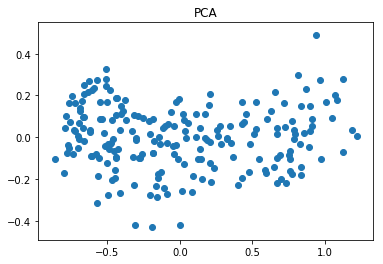

In [7]:
from sklearn.decomposition import PCA

#Nos creamos el modelo
model = PCA()
#Hacemos el fit y el transform
features_pca = model.fit_transform(grain)
#Asingamos a xs e ys los valores de las componentes de la PCA
xs = features_pca[:,0]
ys = features_pca[:,1]
#Hacemos el plot
_ = plt.scatter(xs, ys)
_ = plt.title('PCA')
plt.show()

In [8]:
#Vemos el coeficiente de Pearson
pearson_value, pvalue = pearsonr(xs,ys)
print(pearson_value)
print(pvalue)

2.49155229982e-17
1.0


Podemos ver como obtenemos un coeficiente de Pearson prácticamente 0, es decir, las variables son linealmente independientes. Debemos recordar que los ejes de las componentes principales deben alinearse con la nube de puntos.

# Intrinsic Dimension 

La dimensión intrinseca de un dataset se define como el número de variables necesarias para aproximar un dataset. PCA identifica la dimensión intrinseca de un dataset como aquellas componentes PCA que tienen una varianza significativa. Cuando calculamos las componentes de la PCA están son retornadas de forma que quedan ordenadas por varianza, es decir, la primera componente PCA es aquella que tiene una mayor varianza y así sucesivamente. A continuación calcularemos la primera componente principal de nuestro dataset grains.

In [5]:
#En primer lugar realizamos el scatter plot
_ = plt.scatter(grain[:,0], grain[:,1])

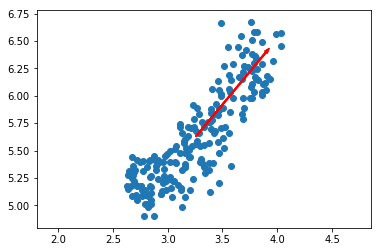

In [7]:
#Obtenemos la primera componente principal
from sklearn.decomposition import PCA
#Nos creamos el modelo
model = PCA()
#Calculamos las PCA features
features_PCA = model.fit(grain)
#Extraemos las coordenadas de la media de los datos
mean = model.mean_
#Obtenemos la primera componente principal
first_pc = model.components_[0,:]
#Hacemos el plot para ver la dirección de los datos donde más varían
_ = plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color = 'red', width = 0.01)
#Mantenemos los ejes en la misma escala
plt.axis('equal')
plt.show()

Esta es la dirección en la cual los datos de nuestro dataset grain tiene una mayor varianza.

A continuación vamos hacer uso del dataset fish que contiene datos de 6 dimensiones y vamos a ver su dimensión intrinseca.

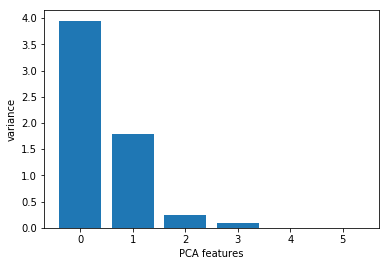

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd
#Importamos datos y nos quedamos con los valores numéricos
df = pd.read_csv('fish.csv')
df.head()
numeric_data = df.drop('Bream', axis = 1).values

#Estandarizamos las variables numéricas
scaler = StandardScaler()
#Nos creamos el modelo PCA
model = PCA()
#Nos creamos el pipeline
pipeline = make_pipeline(scaler, model)
#Fijamos el pipeline
pipeline.fit(numeric_data)

#Mostramos los resultados obtenidos por pantalla
features_pca = range(model.n_components_)
_ = plt.bar(features_pca, model.explained_variance_)
_ = plt.xlabel('PCA features')
_ = plt.ylabel('variance')
_ = plt.xticks(features_pca)
plt.show()

Podemos ver como las dos primeras componentes principales son las que más varianza aportan, por lo que este dataset puede ser considerado de dimensión intrinseca 2.

Ahora que tenemos claro que un valor razonable para la dimensión intrinseca es 2, vamos a proceder a reducir la dimensionalidad de los datos haciendo uso de la PCA.

In [24]:
#Nos creamos nuestro StandardScaler
scaler = StandardScaler()
#Nos creamos nuestra PCA con dos componentes
pca = PCA(n_components = 2)
#Nos creamos el pipeline
pipeline = make_pipeline(scaler, pca)
#Fijamos el pipeline
pipeline.fit(grain)
#Nos creamos el transform
features_pca = pipeline.transform(grain)
#Vemos el tamaño de nuestro conjunto de datos
print(features_pca.shape)

(210, 2)
